## Зимин Евгений Евгеньевич

### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**: 7.5 / 7.5

***DeadLine - 28.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style="darkgrid")
filterwarnings("ignore")

In [2]:
x = load_npz("x.npz")
y = np.load("y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 290 ms, sys: 2.03 ms, total: 292 ms
Wall time: 294 ms
Train ROC-AUC 0.9880
Valid ROC-AUC 0.9476
Test ROC-AUC 0.9498


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

Max depth: 1, Train ROC-AUC: 0.845, Test ROC-AUC: 0.844
Max depth: 3, Train ROC-AUC: 0.933, Test ROC-AUC: 0.929
Max depth: 5, Train ROC-AUC: 0.950, Test ROC-AUC: 0.943
Max depth: 7, Train ROC-AUC: 0.962, Test ROC-AUC: 0.952
Max depth: 9, Train ROC-AUC: 0.970, Test ROC-AUC: 0.953
Max depth: 11, Train ROC-AUC: 0.976, Test ROC-AUC: 0.956
Max depth: 13, Train ROC-AUC: 0.980, Test ROC-AUC: 0.954
Max depth: 15, Train ROC-AUC: 0.984, Test ROC-AUC: 0.956
Max depth: 17, Train ROC-AUC: 0.985, Test ROC-AUC: 0.953
Max depth: 19, Train ROC-AUC: 0.987, Test ROC-AUC: 0.950
Max depth: 21, Train ROC-AUC: 0.988, Test ROC-AUC: 0.945
Max depth: 23, Train ROC-AUC: 0.988, Test ROC-AUC: 0.946
Max depth: 25, Train ROC-AUC: 0.988, Test ROC-AUC: 0.952
Max depth: 27, Train ROC-AUC: 0.988, Test ROC-AUC: 0.949
Max depth: 29, Train ROC-AUC: 0.988, Test ROC-AUC: 0.949


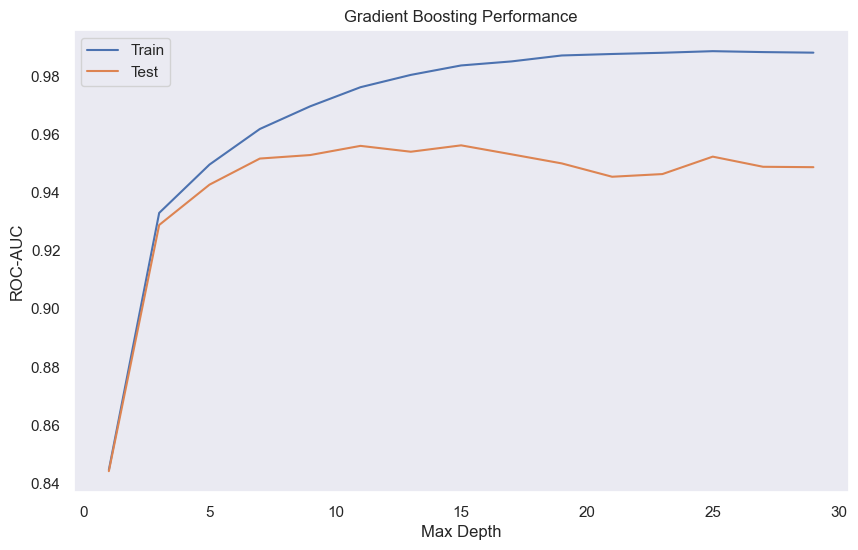

In [7]:
# Перебор значений максимальной глубины деревьев

np.random.seed(42)
max_depths = range(1, 30, 2)
train_scores = []
test_scores = []

for max_depth in max_depths:
    # Создание и обучение бустинга
    booster = Boosting(base_model_params={'max_depth': max_depth})
    booster.fit(x_train, y_train, x_test, y_test)

    # Оценка качества на обучающей и тестовой выборках
    train_score = booster.score(x_train, y_train)
    test_score = booster.score(x_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"Max depth: {max_depth}, Train ROC-AUC: {train_score:.3f}, Test ROC-AUC: {test_score:.3f}")

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train')
plt.plot(max_depths, test_scores, label='Test')
plt.xlabel('Max Depth')
plt.ylabel('ROC-AUC')
plt.title('Gradient Boosting Performance')
plt.legend()
plt.grid()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Наилучшая модель имеет качество на тесте = 0.956 (ROC_AUC), и это модель со значением максимальной глубины 11, 15. При малых значениях глубины мы имеем довольно простые деревья, которые не могут аппроксимировать зависимости в данных, поэтому что на трейне, что на тесте низкое качество. По мере увеличения деревья становится более сложными, лучше моделируют. При глубине в 11, 15 достигается максимум скора на тесте. При еще большем увеличении мы имеем переобучение, деревья слишком сложные и запоминают данные, что плохо отражается на обобщающей способности.


## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

In [8]:
import optuna

def objective(trial):
    # Подбор гиперпараметров
    max_depth = trial.suggest_int('max_depth', 1, 30, 2)
    n_estimators = trial.suggest_int('n_estimators', 50, 300, 50)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.3, 0.9)

    # Создание и обучение бустинга
    booster = Boosting(
        base_model_params={'max_depth': max_depth},
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        early_stopping_rounds=10,
        plot=False
    )
    booster.fit(x_train, y_train, x_valid, y_valid)

    # Оценка качества на валидационной выборке
    val_score = booster.score(x_valid, y_valid)
    return val_score

# Создание оптимизатора и поиск лучших гиперпараметров
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print('Best hyperparameters:')
print(study.best_params)
print('Best validation score:', study.best_value)

# Оценка качества на тестовой выборке
best_booster = Boosting(
    base_model_params={'max_depth': study.best_params['max_depth']},
    n_estimators=study.best_params['n_estimators'],
    learning_rate=study.best_params['learning_rate'],
    subsample=study.best_params['subsample'],
    early_stopping_rounds=10,
    plot=False,
    max_features=x_train.shape[1],
)
best_booster.fit(x_train, y_train, x_valid, y_valid)
test_score = best_booster.score(x_test, y_test)
print('Test score:', test_score)

[I 2024-05-08 20:24:56,068] A new study created in memory with name: no-name-69429124-4e35-4678-93c8-4d7d26acc194
[I 2024-05-08 20:25:38,060] Trial 0 finished with value: 0.9287250876008984 and parameters: {'max_depth': 19, 'n_estimators': 200, 'learning_rate': 0.0969459931814173, 'subsample': 0.525813758149161}. Best is trial 0 with value: 0.9287250876008984.
[I 2024-05-08 20:26:42,867] Trial 1 finished with value: 0.9196931394865577 and parameters: {'max_depth': 29, 'n_estimators': 200, 'learning_rate': 0.19403049293261926, 'subsample': 0.6219854086592873}. Best is trial 0 with value: 0.9287250876008984.
[I 2024-05-08 20:26:57,492] Trial 2 finished with value: 0.9513465182694104 and parameters: {'max_depth': 1, 'n_estimators': 200, 'learning_rate': 0.18762727434933468, 'subsample': 0.892814511560396}. Best is trial 2 with value: 0.9513465182694104.
[I 2024-05-08 20:27:08,564] Trial 3 finished with value: 0.9324739103744629 and parameters: {'max_depth': 15, 'n_estimators': 100, 'learn

Best hyperparameters:
{'max_depth': 1, 'n_estimators': 200, 'learning_rate': 0.18762727434933468, 'subsample': 0.892814511560396}
Best validation score: 0.9513465182694104
Test score: 0.9494191886629957


Итак, выше мы получили наилучшие гиперпараметры и максимальный скор на тестовой выборке, равный 0.934.

## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

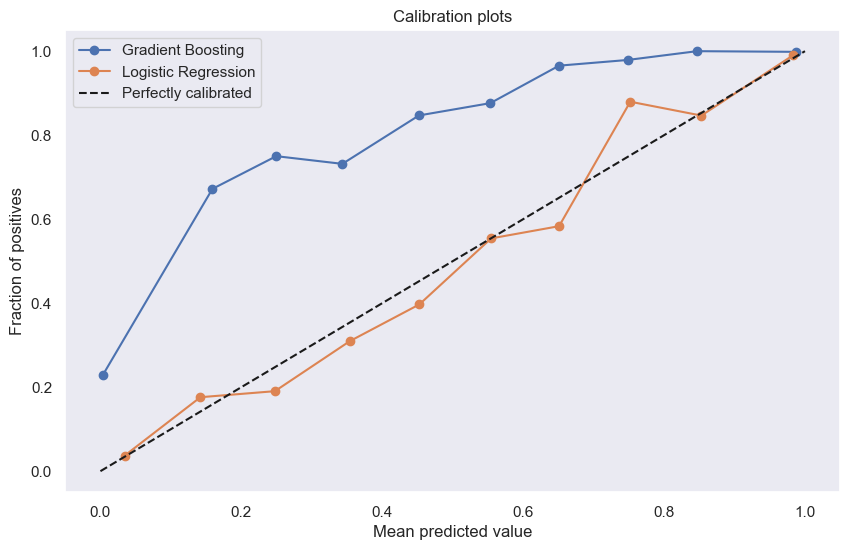

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

# Построение калибровочной кривой для градиентного бустинга 
prob_gb = np.clip(best_booster.predict_proba(x_test)[:, 1], 0, 1)
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_gb, n_bins=10)

# Обучение логистической регрессии
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Построение калибровочной кривой для логистической регрессии
prob_lr = lr.predict_proba(x_test)[:, 1]
fraction_of_positives_lr, mean_predicted_value_lr = calibration_curve(y_test, prob_lr, n_bins=10)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Gradient Boosting')
plt.plot(mean_predicted_value_lr, fraction_of_positives_lr, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration plots')
plt.legend()
plt.grid()
plt.show()

**Вывод**: логистическая регрессия намного лучше с точки зрения оценивания вероятностей, хорошо походит на калибровочную кривую. Реализованный бустинг получился чуть дальше от идеальной линии.

Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

Text(0, 0.5, 'Важность')

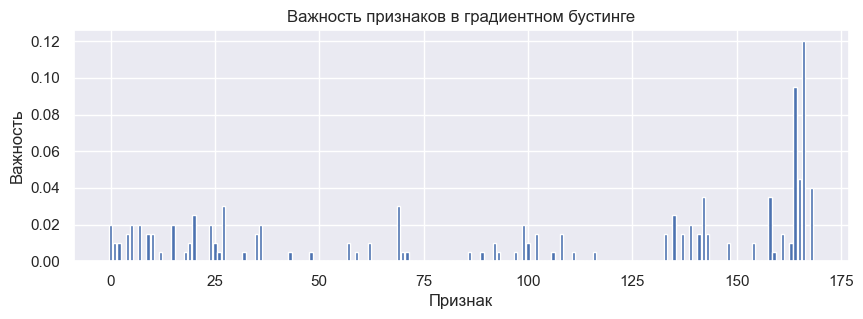

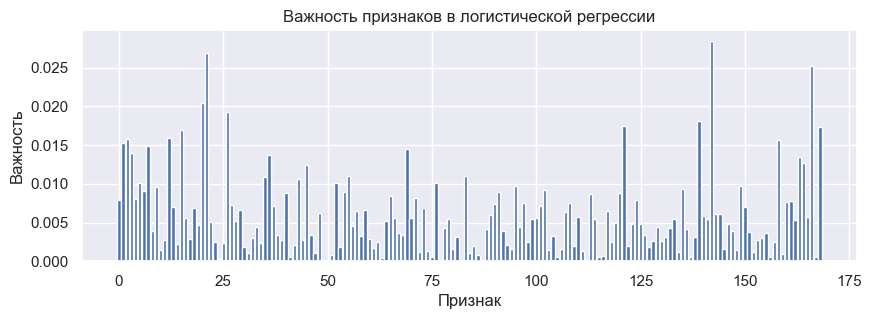

In [11]:
# Градиентный бустинг
boosting_importances = best_booster.feature_importances_
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(range(len(boosting_importances)), boosting_importances)
ax.set_title('Важность признаков в градиентном бустинге')
ax.set_xlabel('Признак')
ax.set_ylabel('Важность')

# Логистическая регрессия
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
logistic_importances = np.abs(logistic_regression.coef_[0])
logistic_importances /= logistic_importances.sum()  # Нормализация
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(range(len(logistic_importances)), logistic_importances)
ax.set_title('Важность признаков в логистической регрессии')
ax.set_xlabel('Признак')
ax.set_ylabel('Важность')

**Вывод**: графики отличаются, но в принципе понятно, поскольку градиентный бустинг и логистическая регрессия используют разные подходы к моделированию и могут по-разному оценивать важность признаков. Градиентный бустинг может выявить более сложные нелинейные зависимости и взаимодействия между признаками, в то время как логистическая регрессия основана на линейных связях. Видимо, по этой причине градиентный бустинг в качестве важных параметров рассматривается с индексами между 150 и 175, а логистическая регрессия в целом равномерно подчеркивает все признаки.

Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

In [12]:
# Отфильтруем 20 наименее важных признаков
num_features_to_keep = x_train.shape[1] - 20
important_features_idx = np.argsort(boosting_importances)[-num_features_to_keep:]

# Обучим модель заново, используя только важные признаки
x_train_filtered = x_train[:, important_features_idx]
x_valid_filtered = x_valid[:, important_features_idx]

best_booster_filtered = Boosting(
    base_model_params={'max_depth': study.best_params['max_depth']},
    n_estimators=study.best_params['n_estimators'],
    learning_rate=study.best_params['learning_rate'],
    subsample=study.best_params['subsample'],
    early_stopping_rounds=10,
    plot=False,
    max_features=num_features_to_keep,
)

best_booster_filtered.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)

# Оценим качество новой модели
train_score_filtered = best_booster_filtered.score(x_train_filtered, y_train)
valid_score_filtered = best_booster_filtered.score(x_valid_filtered, y_valid)

print(f"Качество модели до фильтрации: Train AUC={best_booster.score(x_train, y_train):.3f}, Valid AUC={best_booster.score(x_valid, y_valid):.4f}")
print(f"Качество модели после фильтрации: Train AUC={train_score_filtered:.3f}, Valid AUC={valid_score_filtered:.4f}")


Качество модели до фильтрации: Train AUC=0.952, Valid AUC=0.9507
Качество модели после фильтрации: Train AUC=0.953, Valid AUC=0.9514


**Вывод**: Как видно, качество модели улучшилось на валидационном наборах данных после удаления 20 наименее важных признаков. Это говорит о том, что в исходных данных присутствовали некоторые избыточные или малозначимые признаки, которые негативно влияли на производительность модели градиентного бустинга.

## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [13]:
from sklearn.metrics import roc_auc_score

# Обучение логистической регрессии
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Получение предсказаний для тренировочного и валидационного наборов
train_lr_proba = lr.predict_proba(x_train)[:, 1]
valid_lr_proba = lr.predict_proba(x_valid)[:, 1]

train_boosting_proba = best_booster.predict_proba(x_train)[:, 1]
valid_boosting_proba = best_booster.predict_proba(x_valid)[:, 1]

# Объединение предсказаний в одну матрицу
x_train_blended = np.column_stack((train_boosting_proba, train_lr_proba))
x_valid_blended = np.column_stack((valid_boosting_proba, valid_lr_proba))

# Обучение модели блендинга (логистическая регрессия)
blended_model = LogisticRegression()
blended_model.fit(x_train_blended, y_train)

# Оценка качества модели блендинга
train_blended_score = roc_auc_score(y_train, blended_model.predict_proba(x_train_blended)[:, 1])
valid_blended_score = roc_auc_score(y_valid, blended_model.predict_proba(x_valid_blended)[:, 1])

print(f"Качество модели градиентного бустинга: Train AUC={best_booster_filtered.score(x_train_filtered, y_train):.3f}, Valid AUC={best_booster_filtered.score(x_valid_filtered, y_valid):.3f}")
print(f"Качество модели блендинга: Train AUC={train_blended_score:.3f}, Valid AUC={valid_blended_score:.3f}")

Качество модели градиентного бустинга: Train AUC=0.953, Valid AUC=0.951
Качество модели блендинга: Train AUC=0.965, Valid AUC=0.963


**Вывод**: качество модели блендинга улучшилось по сравнению с моделью градиентного бустинга, как на тренировочном, так и на валидационном наборах. Это говорит о том, что комбинация предсказаний градиентного бустинга и логистической регрессии позволила получить более точную модель.

## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [14]:
from catboost import CatBoostClassifier

# Обучение CatBoost
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=False)
cat_model.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=10)

# Оценка качества CatBoost
train_cat_score = roc_auc_score(y_train, cat_model.predict_proba(x_train)[:, 1])
valid_cat_score = roc_auc_score(y_valid, cat_model.predict_proba(x_valid)[:, 1])

print(f"Качество модели CatBoost: Train AUC={train_cat_score:.3f}, Valid AUC={valid_cat_score:.3f}")
print(f"Качество модели градиентного бустинга: Train AUC={best_booster_filtered.score(x_train_filtered, y_train):.3f}, Valid AUC={best_booster_filtered.score(x_valid_filtered, y_valid):.3f}")


Качество модели CatBoost: Train AUC=0.962, Valid AUC=0.962
Качество модели градиентного бустинга: Train AUC=0.953, Valid AUC=0.951


**Вывод**: модель CatBoost показала лучшие результаты на валидационном наборах по сравнению с нашей реализацией градиентного бустинга. Это демонстрирует, что использование готовых библиотек, таких как CatBoost, может быть более эффективным, особенно для сложных задач с категориальными признаками и сложными нелинейными зависимостями.

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)
